In [138]:
%matplotlib notebook

In [139]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [35]:
import sys
import helper
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [118]:
#DIR_IN = sys.argv[1]
DIR_IN = 'download/human_ann_2016_08/validation'
FILE_IN="{}/labels_per_image.csv".format(DIR_IN)
FILE_IN_LABELS = '{}/labels_3_wc.txt'.format(DIR_IN)
PLOT_OUT="{}/labels_per_image.png".format(DIR_IN)

In [125]:

sns.set_style("whitegrid", {'axes.grid' : False})

INPUT_LABELS = open(FILE_IN_LABELS)
next(INPUT_LABELS)

INPUT = open(FILE_IN)
next(INPUT) # Skip header
line_count = helper.get_line_count(FILE_IN) - 1
#helper.print_file_count(FILE_IN, line_count)

def get_xy_data(d):
    return list(map(int, d.strip().split(',')))

def plot_labels_per_image(data, filename, dpi = 300, figsize=(4,2), save = True):
    assert(len(data[:,0]) == len(data[:,1]))

    fig = plt.figure(figsize = figsize)

    ax = plt.gca()

    plt.bar(data[:,0], data[:,1], align='center')
    #plt.axes.Axes.set_xlabel(xlabel = 'yes')
    ax.set_xlabel('# Labels')
    ax.set_ylabel('# Images')
    plt.tight_layout()
    if save:
        plt.savefig(filename, dpi = dpi)
        
        
data = np.array([get_xy_data(x) for x in INPUT], dtype=np.int32)
labels = data[:,0]
images = data[:,1]


data_labels = np.array([(idx, int(x.split(',')[1])) for idx, x in enumerate(INPUT_LABELS)], dtype=np.int32)

In [ ]:
plot_labels_per_image(data, PLOT_OUT, save = False)
plt.show()

In [ ]:
a = 0
sum_images = sum([images for labels, images in data])
for labels, images in data:
    a += labels * images
    
minimum = min([labels for labels, images in data if images > 0])
maximum = max([labels for labels, images in data if images > 0])
print('Avg: {:.2f}, Min: {}, Max: {}'.format(a / sum_images, minimum, maximum))


<IPython.core.display.Javascript object>


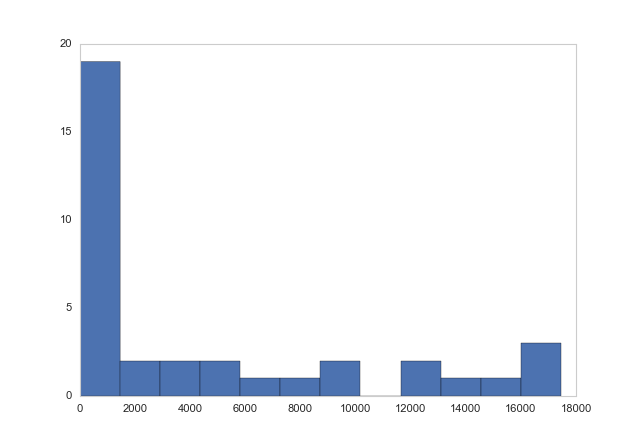

In [140]:
n, bins, patches = plt.hist(images, 12, alpha=1)
#print()
#plt.plot(bins)
plt.show()

In [235]:
labels = data_labels[:,1]
minimum = min(labels)
maximum = max(labels)

bins_ = [0, 15, 150, 1500, 15000]
num_bins = len(bins_) - 1
bins = np.zeros(num_bins)

def below(data, value):
    return data[data < value]

def get_ratio_below(data, value):
    return round(len(below(data, value)) / len(data) * 100, 2)

print(get_ratio_below(labels, 10))
print(get_ratio_below(labels, 100))

for i in labels:
    found = False
    for idx, bin_ in enumerate(reversed(bins_)):
        if found:
            continue
        if i > bin_:
            found = True
            bins[idx - 1] += 1
            
assert(len(labels) == sum(bins))

bins = list(reversed(bins))

x = np.arange(0, num_bins, 1)
x_ticks = []
for idx in range(num_bins):
    start = int(bins_[idx])
    end = int(bins_[idx + 1])
    x_ticks.append(str(start) + '-' + str(end))
print(bins)
fig = plt.figure(figsize = (12, 4))

plt.bar(x, bins, align = 'center')
plt.xticks(np.arange(0, len(bins_) - 1, 1), x_ticks)
plt.yticks([])
ax = plt.gca()
ax.set_ylabel('# labels')
ax.set_xlabel('# Images')
plt.tight_layout()
#plt.xticks([])
''

15.42
52.09
[1377.0, 4053.0, 1754.0, 159.0]


<IPython.core.display.Javascript object>

''

Avg 237.148849244


<IPython.core.display.Javascript object>


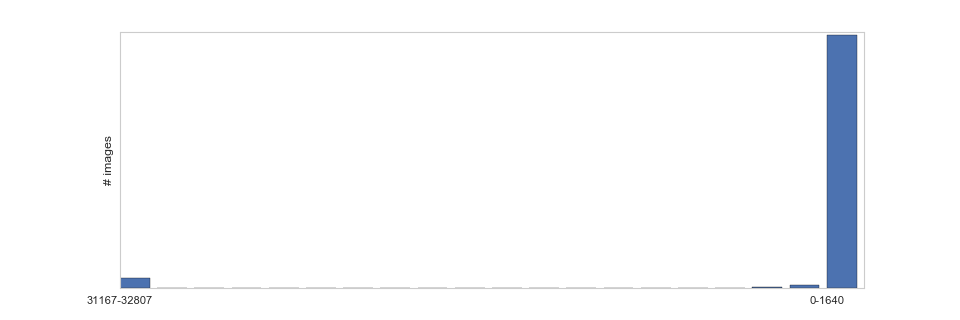

In [231]:


num_bins = 20
bins = np.zeros(num_bins)
step_size = (maximum - minimum) / (num_bins)
for i in labels:
    bin_ = (i - minimum - 1) / step_size
    bin_ = math.floor(bin_)
    bins[bin_] += 1
bins = list(reversed(bins))
    
print('Avg', sum(labels) / len(labels))
    
if True:
    x_ticks = []
    last = maximum
    for x in range(num_bins):
        start = int(x * step_size)
        end = int(start + step_size)
        if x == num_bins - 1 or x == 0:
            x_ticks.append(str(start) + '-' + str(end))
        else:
            x_ticks.append('')
        #x_ticks.append(str(start) + '-' + str(end) if x % 2 == 0 else '')
        
    x = np.arange(0, num_bins, 1)
    fig = plt.figure(figsize = (12, 4))
    plt.bar(x, bins)#, align = 'center')

    x_ticks = list(reversed(x_ticks))
    plt.xticks(np.arange(0, num_bins, 1), x_ticks)
    plt.yticks([])
    #plt.xticks([])
    
    ax = plt.gca()
    ax.set_ylabel('# images')
